In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

import joblib

### Reading data

In [2]:
peru = pd.read_csv('../dataset/dataset2.csv')
peru

,Fecha entrega del Informe,Tipo de vía,Piso,Departamento,Provincia,Distrito,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Categoría del bien,Posición,Número de frentes,Edad,Elevador,Estado de conservación,Método Representado,Área Terreno,Área Construcción,Valor comercial (USD)
0,2020-02-16 00:00:00,1.0,NaN,Piura,Piura,Veintiseis de Octubre,NaN,NaN,"-5,163182","-80,682388",Vivienda Unifamiliar,NaN,NaN,0.0,NaN,En construcción,Costos o reposición (directo),62.50,27.58,25278
1,2019-05-21 00:00:00,1.0,NaN,Lima,Lima,Surquillo,1.0,0.0,"-12,115286","-77,003768",Departamento,NaN,NaN,1.0,NaN,Bueno,Comparación de mercado (directo),9.32,57.47,110807
2,2020-04-11 00:00:00,1.0,NaN,Junín,Satipo,Satipo,0.0,0.0,"-11,235446","-74,629221",Vivienda Unifamiliar,NaN,NaN,7.0,NaN,Regular,Costos o reposición (directo),126.00,84.00,42285
3,2016-05-24 00:00:00,1.0,NaN,Lima,Lima,Santiago de Surco,0.0,0.0,"-12,126384","-76,975707",Oficina,NaN,NaN,0.0,NaN,NaN,Comparación de mercado (directo),8.60,82.34,165503
4,2016-01-12 00:00:00,3.0,NaN,Lima,Lima,Lima,0.0,0.0,"-12,089613","-76,994475",Vivienda Unifamiliar,NaN,NaN,43.0,NaN,NaN,Comparación de mercado (directo),357.55,423.22,711009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,2019-07-18 00:00:00,1.0,NaN,Lima,Lima,Santiago de Surco,0.0,0.0,"-12,079598","-76,976514",Vivienda Unifamiliar,NaN,NaN,34.0,NaN,Bueno,Costos o reposición (directo),306.00,282.80,604241
53250,2017-10-22 00:00:00,3.0,NaN,Lima,Lima,Magdalena del Mar,1.0,0.0,"-12,088102","-77,064252",Departamento,NaN,NaN,4.0,NaN,Bueno,Comparación de mercado (directo),4.98,86.56,132721
53251,2021-05-31 00:00:00,3.0,NaN,Lima,Lima,Lince,0.0,0.0,"-12,087071","-77,035483",Departamento,NaN,NaN,64.0,NaN,Bueno,Comparación de mercado (directo),18.63,65.77,98655
53252,2018-07-11 00:00:00,3.0,NaN,Lima,Lima,Rímac,1.0,0.0,"-12,030869","-77,025853",Departamento,NaN,NaN,4.0,NaN,Bueno,Comparación de mercado (directo),10.08,70.15,79553


In [3]:
dpd = pd.read_excel('../dataset/peru.xlsx')
dpd

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Departamento,Provincia,Distrito,IdUbigeo
0,Amazonas,NaN,NaN,10000
1,Amazonas,Chachapoyas,NaN,10100
2,Amazonas,Chachapoyas,Chachapoyas,10101
3,Amazonas,Chachapoyas,Asunción,10102
4,Amazonas,Chachapoyas,Balsas,10103
...,...,...,...,...
2072,Ucayali,Padre Abad,Curimana,250303
2073,Ucayali,Padre Abad,Neshuya,250304
2074,Ucayali,Padre Abad,Alexander Von Humboldt,250305
2075,Ucayali,Purús,NaN,250400


In [4]:
dpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Departamento  2077 non-null   object
 1   Provincia     2052 non-null   object
 2   Distrito      1856 non-null   object
 3   IdUbigeo      2077 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 65.0+ KB


In [5]:
dpd = dpd.apply(lambda x: x.str.lower() if x.dtype == "object" else x)  
dpd

,Departamento,Provincia,Distrito,IdUbigeo
0,amazonas,NaN,NaN,10000
1,amazonas,chachapoyas,NaN,10100
2,amazonas,chachapoyas,chachapoyas,10101
3,amazonas,chachapoyas,asunción,10102
4,amazonas,chachapoyas,balsas,10103
...,...,...,...,...
2072,ucayali,padre abad,curimana,250303
2073,ucayali,padre abad,neshuya,250304
2074,ucayali,padre abad,alexander von humboldt,250305
2075,ucayali,purús,NaN,250400


In [6]:
departamentos = dpd['Departamento'].unique()
len(departamentos)

25

In [7]:
provincias = dpd['Provincia'].unique()
len(provincias)

197

In [8]:
distritos = dpd['Distrito'].unique()
len(distritos)
                

1708

In [9]:
provincias = [x for x in provincias if str(x) != 'nan']
len(provincias)

196

In [10]:
provincias[0:10]

['chachapoyas',
 'bagua',
 'bongará',
 'condorcanqui',
 'luya',
 'rodríguez de mendoza',
 'utcubamba',
 'huaraz',
 'aija',
 'antonio raymondi']

### Remove trailing newline from the elements of the list

In [11]:
departamentos = list(map(str.strip, departamentos))
departamentos[0:10]

['amazonas',
 'áncash',
 'apurímac',
 'arequipa',
 'ayacucho',
 'cajamarca',
 'callao',
 'cusco',
 'huancavelica',
 'huánuco']

In [12]:
provincias = list(map(str.strip, provincias))
provincias[0:10]

['chachapoyas',
 'bagua',
 'bongará',
 'condorcanqui',
 'luya',
 'rodríguez de mendoza',
 'utcubamba',
 'huaraz',
 'aija',
 'antonio raymondi']

In [13]:
distritos = [x for x in distritos if str(x) != 'nan']
len(distritos)

1707

In [14]:
distritos = list(map(str.strip, distritos))


### Concat names as ONE HOT ENCODING

In [15]:
departamentos = list(map(lambda x: 'Departamento_' + x, departamentos))
departamentos[0:10]

['Departamento_amazonas',
 'Departamento_áncash',
 'Departamento_apurímac',
 'Departamento_arequipa',
 'Departamento_ayacucho',
 'Departamento_cajamarca',
 'Departamento_callao',
 'Departamento_cusco',
 'Departamento_huancavelica',
 'Departamento_huánuco']

In [16]:
provincias = list(map(lambda x: 'Provincia_' + x, provincias))
provincias[0:10]

['Provincia_chachapoyas',
 'Provincia_bagua',
 'Provincia_bongará',
 'Provincia_condorcanqui',
 'Provincia_luya',
 'Provincia_rodríguez de mendoza',
 'Provincia_utcubamba',
 'Provincia_huaraz',
 'Provincia_aija',
 'Provincia_antonio raymondi']

In [17]:
distritos = list(map(lambda x: 'Distrito_' + x, distritos))
distritos[0:10]

['Distrito_chachapoyas',
 'Distrito_asunción',
 'Distrito_balsas',
 'Distrito_cheto',
 'Distrito_chiliquin',
 'Distrito_chuquibamba',
 'Distrito_granada',
 'Distrito_huancas',
 'Distrito_la jalca',
 'Distrito_leimebamba']

In [18]:
### Create dataframe to concat after ONE HOT ENCODING

In [19]:
dpd_df = pd.DataFrame(columns=departamentos+provincias+distritos)
dpd_df

,Departamento_amazonas,Departamento_áncash,Departamento_apurímac,Departamento_arequipa,Departamento_ayacucho,Departamento_cajamarca,Departamento_callao,Departamento_cusco,Departamento_huancavelica,Departamento_huánuco,...,Distrito_raymondi,Distrito_sepahua,Distrito_tahuania,Distrito_yurua,Distrito_padre abad,Distrito_irazola,Distrito_curimana,Distrito_neshuya,Distrito_alexander von humboldt,Distrito_purus


In [20]:
peru.columns

Index(['Fecha entrega del Informe', 'Tipo de vía', 'Piso', 'Departamento',
       'Provincia', 'Distrito', 'Número de estacionamiento', 'Depósitos',
       'Latitud (Decimal)', 'Longitud (Decimal)', 'Categoría del bien',
       'Posición', 'Número de frentes', 'Edad', 'Elevador',
       'Estado de conservación', 'Método Representado', 'Área Terreno',
       'Área Construcción', 'Valor comercial (USD)'],
      dtype='object')

In [21]:
peru.columns = peru.columns.str.replace(" ", "_")

In [22]:
peru.columns

Index(['Fecha_entrega_del_Informe', 'Tipo_de_vía', 'Piso', 'Departamento',
       'Provincia', 'Distrito', 'Número_de_estacionamiento', 'Depósitos',
       'Latitud_(Decimal)', 'Longitud_(Decimal)', 'Categoría_del_bien',
       'Posición', 'Número_de_frentes', 'Edad', 'Elevador',
       'Estado_de_conservación', 'Método_Representado', 'Área_Terreno',
       'Área_Construcción', 'Valor_comercial_(USD)'],
      dtype='object')

In [23]:
peru.shape

(53254, 20)

In [24]:
peru = peru.drop([3, 5, 6])
peru.shape

(53251, 20)

In [25]:
peru.describe().T

,count,mean,std,min,25%,50%,75%,max
Tipo_de_vía,48240.0,1.959701,1.066048e+00,1.0,1.0,2.0,3.0,10.0
Número_de_estacionamiento,45328.0,0.437324,3.357919e+00,0.0,0.0,0.0,1.0,329.0
Depósitos,45259.0,0.253474,9.652917e+00,0.0,0.0,0.0,0.0,2000.0
Número_de_frentes,97.0,1.216495,2.199559e+00,0.0,1.0,1.0,1.0,22.0
Edad,48462.0,15.892638,3.405949e+01,0.0,2.0,8.0,22.0,2018.0
Elevador,116.0,1.181034,8.402809e-01,0.0,0.0,1.0,2.0,2.0
Valor_comercial_(USD),53251.0,393856.311018,1.081906e+06,21.0,100822.0,174395.0,336830.5,75012015.0


In [26]:
peru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53251 entries, 0 to 53253
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha_entrega_del_Informe  53251 non-null  object 
 1   Tipo_de_vía                48240 non-null  float64
 2   Piso                       21 non-null     object 
 3   Departamento               53251 non-null  object 
 4   Provincia                  53251 non-null  object 
 5   Distrito                   53251 non-null  object 
 6   Número_de_estacionamiento  45328 non-null  float64
 7   Depósitos                  45259 non-null  float64
 8   Latitud_(Decimal)          52388 non-null  object 
 9   Longitud_(Decimal)         52334 non-null  object 
 10  Categoría_del_bien         50802 non-null  object 
 11  Posición                   113 non-null    object 
 12  Número_de_frentes          97 non-null     float64
 13  Edad                       48462 non-null  flo

### Changing DTYPES to columns according to the DICTIONARY OF FIELDS

In [27]:
peru['Área_Terreno'].unique()

array(['62.50', '9.32', '126.00', ..., '474.35', '93.11', '6,212.08'],
      dtype=object)

In [28]:
peru['Número_de_estacionamiento'] = peru['Número_de_estacionamiento'].astype('float64')

In [29]:
peru['Latitud_(Decimal)'] = peru['Latitud_(Decimal)'].replace(',','', regex=True)

In [30]:
peru['Latitud_(Decimal)'] = peru['Latitud_(Decimal)'].astype('float64')

In [31]:
peru['Longitud_(Decimal)'] = peru['Longitud_(Decimal)'].replace(',','', regex=True)

In [32]:
peru['Longitud_(Decimal)'] = peru['Longitud_(Decimal)'].astype('float64')

In [33]:
peru['Área_Terreno'] = peru['Área_Terreno'].replace(',','', regex=True)

In [34]:
peru['Área_Terreno'] = peru['Área_Terreno'].astype('float64')

In [35]:
peru['Área_Construcción'] = peru['Área_Construcción'].replace(',','', regex=True)

In [36]:
peru['Área_Construcción'] = peru['Área_Construcción'].astype('float64')

In [37]:
peru.columns

Index(['Fecha_entrega_del_Informe', 'Tipo_de_vía', 'Piso', 'Departamento',
       'Provincia', 'Distrito', 'Número_de_estacionamiento', 'Depósitos',
       'Latitud_(Decimal)', 'Longitud_(Decimal)', 'Categoría_del_bien',
       'Posición', 'Número_de_frentes', 'Edad', 'Elevador',
       'Estado_de_conservación', 'Método_Representado', 'Área_Terreno',
       'Área_Construcción', 'Valor_comercial_(USD)'],
      dtype='object')

In [38]:
peru['Valor_comercial_(USD)'] = peru['Valor_comercial_(USD)'].replace(',','', regex=True)

In [39]:
peru['Valor_comercial_(USD)'] = peru['Valor_comercial_(USD)'].astype('float64')

In [40]:
peru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53251 entries, 0 to 53253
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha_entrega_del_Informe  53251 non-null  object 
 1   Tipo_de_vía                48240 non-null  float64
 2   Piso                       21 non-null     object 
 3   Departamento               53251 non-null  object 
 4   Provincia                  53251 non-null  object 
 5   Distrito                   53251 non-null  object 
 6   Número_de_estacionamiento  45328 non-null  float64
 7   Depósitos                  45259 non-null  float64
 8   Latitud_(Decimal)          52388 non-null  float64
 9   Longitud_(Decimal)         52334 non-null  float64
 10  Categoría_del_bien         50802 non-null  object 
 11  Posición                   113 non-null    object 
 12  Número_de_frentes          97 non-null     float64
 13  Edad                       48462 non-null  flo

In [41]:
# peru = peru.drop(peru.iloc[:,[19]], axis=1)
# peru

In [42]:
unique_values = peru.apply(lambda col: col.unique())
unique_values


Fecha_entrega_del_Informe    [2020-02-16 00:00:00, 2019-05-21 00:00:00, 202...
Tipo_de_vía                  [1.0, 3.0, 2.0, 5.0, nan, 4.0, 7.0, 9.0, 8.0, ...
Piso                         [nan, DECIMO PRIMER PISO, SEGUNDO PISO, 3, 1, ...
Departamento                 [Piura, Lima, Junín, Áncash, Ucayali, Arequipa...
Provincia                    [Piura, Lima, Satipo, Huaraz, Coronel Portillo...
Distrito                     [Veintiseis de Octubre, Surquillo, Satipo, Lim...
Número_de_estacionamiento    [nan, 1.0, 0.0, 2.0, 3.0, 21.0, 5.0, 6.0, 10.0...
Depósitos                    [nan, 0.0, 1.0, 2.0, 3.0, 5.0, 6.0, 4.0, 108.0...
Latitud_(Decimal)            [-5163182.0, -12115286.0, -11235446.0, -120896...
Longitud_(Decimal)           [-80682388.0, -77003768.0, -74629221.0, -76994...
Categoría_del_bien           [Vivienda Unifamiliar, Departamento, Local Com...
Posición                                             [nan, Exterior, Interior]
Número_de_frentes                              [nan,

In [43]:
for value in unique_values:
    print(value)

['2020-02-16 00:00:00' '2019-05-21 00:00:00' '2020-04-11 00:00:00' ...
 '2020-10-09 00:00:00' '2015-06-29 00:00:00' '2016-03-25 00:00:00']
[ 1.  3.  2.  5. nan  4.  7.  9.  8. 10.  6.]
[nan 'DECIMO PRIMER PISO' 'SEGUNDO PISO' '3' '1'
 'PISO 16 Y ESTACIONAMIENTO 74' '9-10-11' '1 Y 2' '2'
 'Segundo y Tercer piso' '4' 'PISO 1' '6to piso' '1ER PISO'
 'estacionamiento 22' '2DO PISO' '7']
['Piura' 'Lima' 'Junín' 'Áncash' 'Ucayali' 'Arequipa' 'San Martín'
 'Callao' 'Tumbes' 'Loreto' 'Huancavelica' 'La Libertad' 'Puno'
 'Lambayeque' 'Pasco' 'Tacna' 'Huánuco' 'Cusco' 'Cajamarca' 'Apurímac'
 'Moquegua' 'Amazonas' 'Ayacucho' 'Madre de Dios']
['Piura' 'Lima' 'Satipo' 'Huaraz' 'Coronel Portillo' 'Arequipa'
 'Moyobamba' 'Prov. Const. del Callao' 'Zarumilla' 'Maynas' 'San Martín'
 'CHINCHA' 'Trujillo' 'Alto Amazonas' 'Bellavista' 'San Román' 'Santa'
 'Concepción' 'Chiclayo' 'Barranca' 'Chanchamayo' 'Oxapampa' 'Morropón'
 'Huancayo' 'Rioja' 'Tacna' 'Cañete' 'Huancavelica' 'Leoncio Prado'
 'Cusco' 'Hua

In [44]:
peru.loc[:, peru.dtypes==object]

,Fecha_entrega_del_Informe,Piso,Departamento,Provincia,Distrito,Categoría_del_bien,Posición,Estado_de_conservación,Método_Representado
0,2020-02-16 00:00:00,NaN,Piura,Piura,Veintiseis de Octubre,Vivienda Unifamiliar,NaN,En construcción,Costos o reposición (directo)
1,2019-05-21 00:00:00,NaN,Lima,Lima,Surquillo,Departamento,NaN,Bueno,Comparación de mercado (directo)
2,2020-04-11 00:00:00,NaN,Junín,Satipo,Satipo,Vivienda Unifamiliar,NaN,Regular,Costos o reposición (directo)
4,2016-01-12 00:00:00,NaN,Lima,Lima,Lima,Vivienda Unifamiliar,NaN,NaN,Comparación de mercado (directo)
7,2016-06-21 00:00:00,NaN,Áncash,Huaraz,Huaraz,Local Comercial,NaN,NaN,Costos o reposición (directo)
...,...,...,...,...,...,...,...,...,...
53249,2019-07-18 00:00:00,NaN,Lima,Lima,Santiago de Surco,Vivienda Unifamiliar,NaN,Bueno,Costos o reposición (directo)
53250,2017-10-22 00:00:00,NaN,Lima,Lima,Magdalena del Mar,Departamento,NaN,Bueno,Comparación de mercado (directo)
53251,2021-05-31 00:00:00,NaN,Lima,Lima,Lince,Departamento,NaN,Bueno,Comparación de mercado (directo)
53252,2018-07-11 00:00:00,NaN,Lima,Lima,Rímac,Departamento,NaN,Bueno,Comparación de mercado (directo)


In [45]:
peru.apply(lambda x: x.str.lower() if x.dtype == "object" else x)  


,Fecha_entrega_del_Informe,Tipo_de_vía,Piso,Departamento,Provincia,Distrito,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Categoría_del_bien,Posición,Número_de_frentes,Edad,Elevador,Estado_de_conservación,Método_Representado,Área_Terreno,Área_Construcción,Valor_comercial_(USD)
0,2020-02-16 00:00:00,1.0,NaN,piura,piura,veintiseis de octubre,NaN,NaN,-5163182.0,-80682388.0,vivienda unifamiliar,NaN,NaN,0.0,NaN,en construcción,costos o reposición (directo),62.50,27.58,25278.0
1,2019-05-21 00:00:00,1.0,NaN,lima,lima,surquillo,1.0,0.0,-12115286.0,-77003768.0,departamento,NaN,NaN,1.0,NaN,bueno,comparación de mercado (directo),9.32,57.47,110807.0
2,2020-04-11 00:00:00,1.0,NaN,junín,satipo,satipo,0.0,0.0,-11235446.0,-74629221.0,vivienda unifamiliar,NaN,NaN,7.0,NaN,regular,costos o reposición (directo),126.00,84.00,42285.0
4,2016-01-12 00:00:00,3.0,NaN,lima,lima,lima,0.0,0.0,-12089613.0,-76994475.0,vivienda unifamiliar,NaN,NaN,43.0,NaN,NaN,comparación de mercado (directo),357.55,423.22,711009.0
7,2016-06-21 00:00:00,3.0,NaN,áncash,huaraz,huaraz,0.0,0.0,-9528641.0,-77520763.0,local comercial,NaN,NaN,3.0,NaN,NaN,costos o reposición (directo),101.21,425.54,205854.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,2019-07-18 00:00:00,1.0,NaN,lima,lima,santiago de surco,0.0,0.0,-12079598.0,-76976514.0,vivienda unifamiliar,NaN,NaN,34.0,NaN,bueno,costos o reposición (directo),306.00,282.80,604241.0
53250,2017-10-22 00:00:00,3.0,NaN,lima,lima,magdalena del mar,1.0,0.0,-12088102.0,-77064252.0,departamento,NaN,NaN,4.0,NaN,bueno,comparación de mercado (directo),4.98,86.56,132721.0
53251,2021-05-31 00:00:00,3.0,NaN,lima,lima,lince,0.0,0.0,-12087071.0,-77035483.0,departamento,NaN,NaN,64.0,NaN,bueno,comparación de mercado (directo),18.63,65.77,98655.0
53252,2018-07-11 00:00:00,3.0,NaN,lima,lima,rímac,1.0,0.0,-12030869.0,-77025853.0,departamento,NaN,NaN,4.0,NaN,bueno,comparación de mercado (directo),10.08,70.15,79553.0


In [46]:
unique_values = peru.apply(lambda col: col.unique())
unique_values

Fecha_entrega_del_Informe    [2020-02-16 00:00:00, 2019-05-21 00:00:00, 202...
Tipo_de_vía                  [1.0, 3.0, 2.0, 5.0, nan, 4.0, 7.0, 9.0, 8.0, ...
Piso                         [nan, DECIMO PRIMER PISO, SEGUNDO PISO, 3, 1, ...
Departamento                 [Piura, Lima, Junín, Áncash, Ucayali, Arequipa...
Provincia                    [Piura, Lima, Satipo, Huaraz, Coronel Portillo...
Distrito                     [Veintiseis de Octubre, Surquillo, Satipo, Lim...
Número_de_estacionamiento    [nan, 1.0, 0.0, 2.0, 3.0, 21.0, 5.0, 6.0, 10.0...
Depósitos                    [nan, 0.0, 1.0, 2.0, 3.0, 5.0, 6.0, 4.0, 108.0...
Latitud_(Decimal)            [-5163182.0, -12115286.0, -11235446.0, -120896...
Longitud_(Decimal)           [-80682388.0, -77003768.0, -74629221.0, -76994...
Categoría_del_bien           [Vivienda Unifamiliar, Departamento, Local Com...
Posición                                             [nan, Exterior, Interior]
Número_de_frentes                              [nan,

In [47]:
for value in unique_values:
    print(value)

['2020-02-16 00:00:00' '2019-05-21 00:00:00' '2020-04-11 00:00:00' ...
 '2020-10-09 00:00:00' '2015-06-29 00:00:00' '2016-03-25 00:00:00']
[ 1.  3.  2.  5. nan  4.  7.  9.  8. 10.  6.]
[nan 'DECIMO PRIMER PISO' 'SEGUNDO PISO' '3' '1'
 'PISO 16 Y ESTACIONAMIENTO 74' '9-10-11' '1 Y 2' '2'
 'Segundo y Tercer piso' '4' 'PISO 1' '6to piso' '1ER PISO'
 'estacionamiento 22' '2DO PISO' '7']
['Piura' 'Lima' 'Junín' 'Áncash' 'Ucayali' 'Arequipa' 'San Martín'
 'Callao' 'Tumbes' 'Loreto' 'Huancavelica' 'La Libertad' 'Puno'
 'Lambayeque' 'Pasco' 'Tacna' 'Huánuco' 'Cusco' 'Cajamarca' 'Apurímac'
 'Moquegua' 'Amazonas' 'Ayacucho' 'Madre de Dios']
['Piura' 'Lima' 'Satipo' 'Huaraz' 'Coronel Portillo' 'Arequipa'
 'Moyobamba' 'Prov. Const. del Callao' 'Zarumilla' 'Maynas' 'San Martín'
 'CHINCHA' 'Trujillo' 'Alto Amazonas' 'Bellavista' 'San Román' 'Santa'
 'Concepción' 'Chiclayo' 'Barranca' 'Chanchamayo' 'Oxapampa' 'Morropón'
 'Huancayo' 'Rioja' 'Tacna' 'Cañete' 'Huancavelica' 'Leoncio Prado'
 'Cusco' 'Hua

In [48]:
lon = peru['Longitud_(Decimal)']
lon

0       -80682388.0
1       -77003768.0
2       -74629221.0
4       -76994475.0
7       -77520763.0
            ...    
53249   -76976514.0
53250   -77064252.0
53251   -77035483.0
53252   -77025853.0
53253   -78999926.0
Name: Longitud_(Decimal), Length: 53251, dtype: float64

In [49]:
lat = peru['Latitud_(Decimal)']
lat

0        -5163182.0
1       -12115286.0
2       -11235446.0
4       -12089613.0
7        -9528641.0
            ...    
53249   -12079598.0
53250   -12088102.0
53251   -12087071.0
53252   -12030869.0
53253     -808802.0
Name: Latitud_(Decimal), Length: 53251, dtype: float64

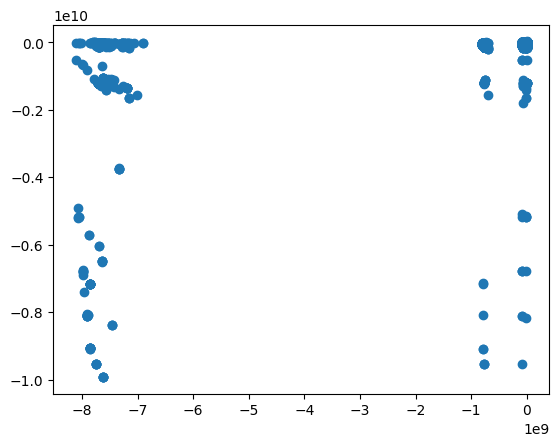

In [50]:
plt.scatter(x=lon, y=lat)

In [51]:
# importing modules
from geopy.geocoders import Nominatim

def location(dataframe):
    # calling the nominatim tool
    geoLoc = Nominatim(user_agent="GetLoc")
    countries = []
    fail_loc = []
    
    for i in range(10):
        # print("yo soy latitud: ",dataframe.iloc[i,0])
        # print("yo soy longitud: ",dataframe.iloc[i,1])
        latitud = dataframe.iloc[i,0]
        longitud = dataframe.iloc[i,1]
        try:
            locname = geoLoc.reverse((latitud, longitud))
            countries.append(locname)
        except Exception:
            fail_loc.append(i)
    # printing the address/location name
    # print(countries)
    print(*countries, sep="\n")
    print("FAIL COORDENADAS: ", fail_loc)
    print(len(countries))

In [52]:
location(peru[['Latitud_(Decimal)', 'Longitud_(Decimal)']])


FAIL COORDENADAS:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0


In [53]:
peru[['Latitud_(Decimal)', 'Longitud_(Decimal)']].shape[0]

53251

In [54]:
peru[['Latitud_(Decimal)', 'Longitud_(Decimal)']]

,Latitud_(Decimal),Longitud_(Decimal)
0,-5163182.0,-80682388.0
1,-12115286.0,-77003768.0
2,-11235446.0,-74629221.0
4,-12089613.0,-76994475.0
7,-9528641.0,-77520763.0
...,...,...
53249,-12079598.0,-76976514.0
53250,-12088102.0,-77064252.0
53251,-12087071.0,-77035483.0
53252,-12030869.0,-77025853.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f85957f5750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f85957f5c00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f85957f54b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f85957f6140>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f85957f63e0>],
 'means': []}

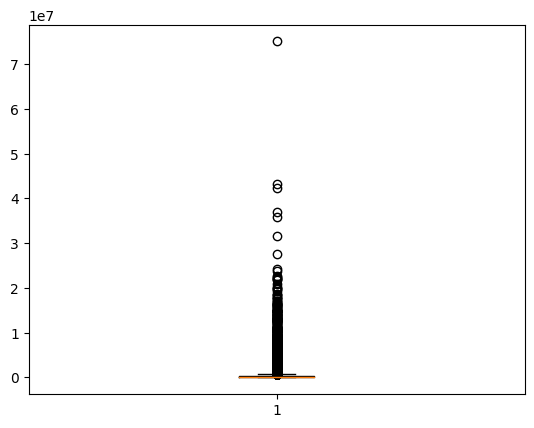

In [55]:
plt.boxplot(peru['Valor_comercial_(USD)'])

In [56]:
null = peru.isna().sum()
miss_per = pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/53254)*100).round(2)
miss_per

,Missing,Missing%
Tipo_de_vía,5011,9.41
Piso,53230,99.95
Número_de_estacionamiento,7923,14.88
Depósitos,7992,15.01
Latitud_(Decimal),863,1.62
Longitud_(Decimal),917,1.72
Categoría_del_bien,2449,4.60
Posición,53138,99.78
Número_de_frentes,53154,99.81
Edad,4789,8.99


### Drop columns with the most NAN values and unnecessary columns

In [57]:
peru = peru.drop(["Piso", "Elevador", "Posición", "Número_de_frentes"], axis=1)


In [58]:
peru = peru.drop('Fecha_entrega_del_Informe', axis=1)

In [59]:
peru

,Tipo_de_vía,Departamento,Provincia,Distrito,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Categoría_del_bien,Edad,Estado_de_conservación,Método_Representado,Área_Terreno,Área_Construcción,Valor_comercial_(USD)
0,1.0,Piura,Piura,Veintiseis de Octubre,NaN,NaN,-5163182.0,-80682388.0,Vivienda Unifamiliar,0.0,En construcción,Costos o reposición (directo),62.50,27.58,25278.0
1,1.0,Lima,Lima,Surquillo,1.0,0.0,-12115286.0,-77003768.0,Departamento,1.0,Bueno,Comparación de mercado (directo),9.32,57.47,110807.0
2,1.0,Junín,Satipo,Satipo,0.0,0.0,-11235446.0,-74629221.0,Vivienda Unifamiliar,7.0,Regular,Costos o reposición (directo),126.00,84.00,42285.0
4,3.0,Lima,Lima,Lima,0.0,0.0,-12089613.0,-76994475.0,Vivienda Unifamiliar,43.0,NaN,Comparación de mercado (directo),357.55,423.22,711009.0
7,3.0,Áncash,Huaraz,Huaraz,0.0,0.0,-9528641.0,-77520763.0,Local Comercial,3.0,NaN,Costos o reposición (directo),101.21,425.54,205854.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,1.0,Lima,Lima,Santiago de Surco,0.0,0.0,-12079598.0,-76976514.0,Vivienda Unifamiliar,34.0,Bueno,Costos o reposición (directo),306.00,282.80,604241.0
53250,3.0,Lima,Lima,Magdalena del Mar,1.0,0.0,-12088102.0,-77064252.0,Departamento,4.0,Bueno,Comparación de mercado (directo),4.98,86.56,132721.0
53251,3.0,Lima,Lima,Lince,0.0,0.0,-12087071.0,-77035483.0,Departamento,64.0,Bueno,Comparación de mercado (directo),18.63,65.77,98655.0
53252,3.0,Lima,Lima,Rímac,1.0,0.0,-12030869.0,-77025853.0,Departamento,4.0,Bueno,Comparación de mercado (directo),10.08,70.15,79553.0


### Check all missing values

In [60]:
null = peru.isna().sum()
miss_per = pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/53254)*100).round(2)
miss_per

,Missing,Missing%
Tipo_de_vía,5011,9.41
Número_de_estacionamiento,7923,14.88
Depósitos,7992,15.01
Latitud_(Decimal),863,1.62
Longitud_(Decimal),917,1.72
Categoría_del_bien,2449,4.60
Edad,4789,8.99
Estado_de_conservación,15698,29.48
Método_Representado,7,0.01
Área_Terreno,1153,2.17


### Fill NaN Values

Tipo de via -> moda

Número de estacionamiento -> moda

Depósitos -> moda

Latitud -> Interpolation

Longitud -> Interpolation

Categoria del bien -> moda

Edad -> mean

Estado de conservacion -> moda

Metodo Representado -> moda

Area terreno -> moda

Area construccion -> moda


In [61]:
peru['Tipo_de_vía'].fillna(peru['Tipo_de_vía'].mode().iloc[0], inplace=True)

In [62]:
peru['Número_de_estacionamiento'].fillna(peru['Número_de_estacionamiento'].mode().iloc[0], inplace=True)

In [63]:
peru['Depósitos'].fillna(peru['Depósitos'].mode().iloc[0], inplace=True)

In [64]:
peru['Latitud_(Decimal)'] = peru['Latitud_(Decimal)'].interpolate(method='linear', axis=0)

In [65]:
peru['Longitud_(Decimal)'] = peru['Longitud_(Decimal)'].interpolate(method='linear', axis=0)

In [66]:
peru['Categoría_del_bien'].fillna(peru['Categoría_del_bien'].mode().iloc[0], inplace=True)

In [67]:
peru['Edad'].fillna(peru['Edad'].mode().iloc[0], inplace=True)

In [68]:
peru['Estado_de_conservación'].fillna(peru['Estado_de_conservación'].mode().iloc[0], inplace=True)

In [69]:
peru['Método_Representado'].fillna(peru['Método_Representado'].mode().iloc[0], inplace=True)

In [70]:
peru['Área_Terreno'].fillna(peru['Área_Terreno'].mode().iloc[0], inplace=True)

In [71]:
peru['Área_Construcción'].fillna(peru['Área_Construcción'].mode().iloc[0], inplace=True)

### Check all missing values again...

In [72]:
null = peru.isna().sum()
miss_per = pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/53254)*100).round(2)
miss_per

,Missing,Missing%


### ok... no more missing values ! :D

### Visualizing the correlations between numerical variables

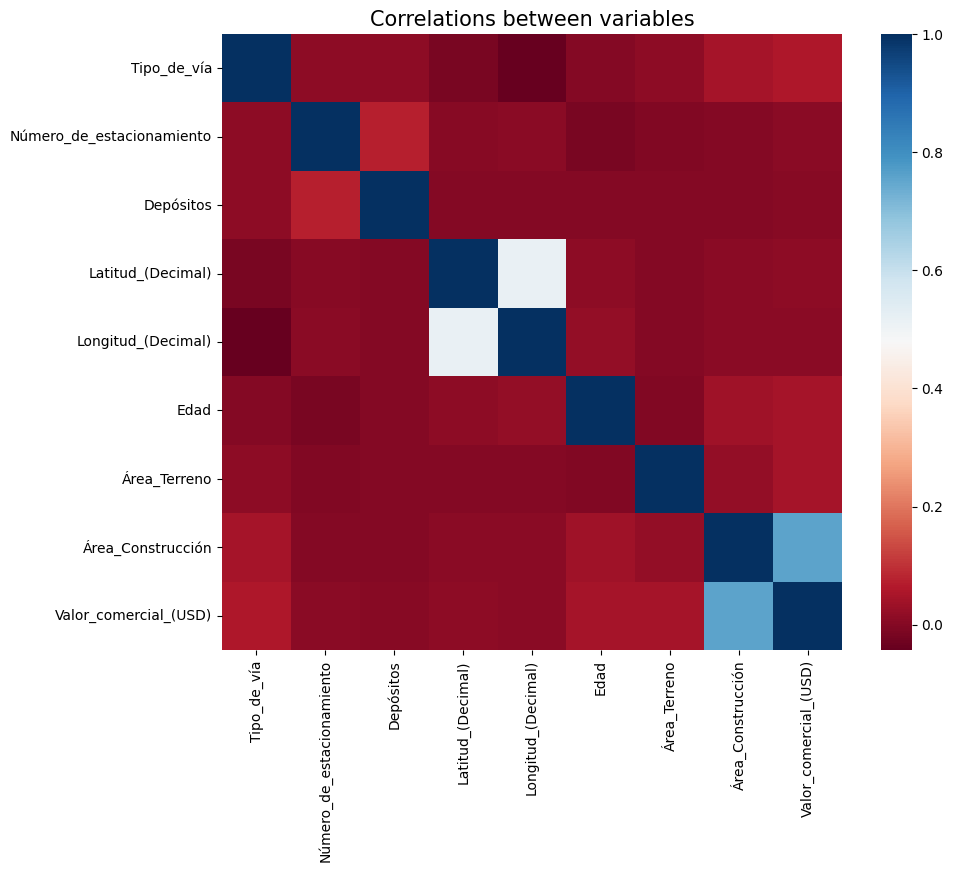

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(peru.corr(), cmap="RdBu")
plt.title("Correlations between variables", size=15)
plt.show()

In [74]:
peru

,Tipo_de_vía,Departamento,Provincia,Distrito,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Categoría_del_bien,Edad,Estado_de_conservación,Método_Representado,Área_Terreno,Área_Construcción,Valor_comercial_(USD)
0,1.0,Piura,Piura,Veintiseis de Octubre,0.0,0.0,-5163182.0,-80682388.0,Vivienda Unifamiliar,0.0,En construcción,Costos o reposición (directo),62.50,27.58,25278.0
1,1.0,Lima,Lima,Surquillo,1.0,0.0,-12115286.0,-77003768.0,Departamento,1.0,Bueno,Comparación de mercado (directo),9.32,57.47,110807.0
2,1.0,Junín,Satipo,Satipo,0.0,0.0,-11235446.0,-74629221.0,Vivienda Unifamiliar,7.0,Regular,Costos o reposición (directo),126.00,84.00,42285.0
4,3.0,Lima,Lima,Lima,0.0,0.0,-12089613.0,-76994475.0,Vivienda Unifamiliar,43.0,Bueno,Comparación de mercado (directo),357.55,423.22,711009.0
7,3.0,Áncash,Huaraz,Huaraz,0.0,0.0,-9528641.0,-77520763.0,Local Comercial,3.0,Bueno,Costos o reposición (directo),101.21,425.54,205854.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,1.0,Lima,Lima,Santiago de Surco,0.0,0.0,-12079598.0,-76976514.0,Vivienda Unifamiliar,34.0,Bueno,Costos o reposición (directo),306.00,282.80,604241.0
53250,3.0,Lima,Lima,Magdalena del Mar,1.0,0.0,-12088102.0,-77064252.0,Departamento,4.0,Bueno,Comparación de mercado (directo),4.98,86.56,132721.0
53251,3.0,Lima,Lima,Lince,0.0,0.0,-12087071.0,-77035483.0,Departamento,64.0,Bueno,Comparación de mercado (directo),18.63,65.77,98655.0
53252,3.0,Lima,Lima,Rímac,1.0,0.0,-12030869.0,-77025853.0,Departamento,4.0,Bueno,Comparación de mercado (directo),10.08,70.15,79553.0


In [75]:
peru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53251 entries, 0 to 53253
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo_de_vía                53251 non-null  float64
 1   Departamento               53251 non-null  object 
 2   Provincia                  53251 non-null  object 
 3   Distrito                   53251 non-null  object 
 4   Número_de_estacionamiento  53251 non-null  float64
 5   Depósitos                  53251 non-null  float64
 6   Latitud_(Decimal)          53251 non-null  float64
 7   Longitud_(Decimal)         53251 non-null  float64
 8   Categoría_del_bien         53251 non-null  object 
 9   Edad                       53251 non-null  float64
 10  Estado_de_conservación     53251 non-null  object 
 11  Método_Representado        53251 non-null  object 
 12  Área_Terreno               53251 non-null  float64
 13  Área_Construcción          53251 non-null  flo

In [76]:
peru.columns

Index(['Tipo_de_vía', 'Departamento', 'Provincia', 'Distrito',
       'Número_de_estacionamiento', 'Depósitos', 'Latitud_(Decimal)',
       'Longitud_(Decimal)', 'Categoría_del_bien', 'Edad',
       'Estado_de_conservación', 'Método_Representado', 'Área_Terreno',
       'Área_Construcción', 'Valor_comercial_(USD)'],
      dtype='object')

### One-Hot Encoding
Encoding the categorical features in X dataset by using One-Hot Encoding method

In [77]:
cat_cols = ["Departamento",
            "Provincia" ,
            "Distrito",
            "Categoría_del_bien",
            "Estado_de_conservación",
            "Método_Representado"]
peru = pd.get_dummies(peru, columns=cat_cols)

In [78]:
peru

,Tipo_de_vía,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Edad,Área_Terreno,Área_Construcción,Valor_comercial_(USD),Departamento_Amazonas,...,Estado_de_conservación_Bueno - Regular,Estado_de_conservación_En construcción,Estado_de_conservación_En proyecto,Estado_de_conservación_Malo,Estado_de_conservación_Muy bueno,Estado_de_conservación_Regular,Estado_de_conservación_Regular - Malo,Método_Representado_Comparación de mercado (directo),Método_Representado_Costos o reposición (directo),Método_Representado_Renta o capitalización (indirecto)
0,1.0,0.0,0.0,-5163182.0,-80682388.0,0.0,62.50,27.58,25278.0,0,...,0,1,0,0,0,0,0,0,1,0
1,1.0,1.0,0.0,-12115286.0,-77003768.0,1.0,9.32,57.47,110807.0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0.0,0.0,-11235446.0,-74629221.0,7.0,126.00,84.00,42285.0,0,...,0,0,0,0,0,1,0,0,1,0
4,3.0,0.0,0.0,-12089613.0,-76994475.0,43.0,357.55,423.22,711009.0,0,...,0,0,0,0,0,0,0,1,0,0
7,3.0,0.0,0.0,-9528641.0,-77520763.0,3.0,101.21,425.54,205854.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,1.0,0.0,0.0,-12079598.0,-76976514.0,34.0,306.00,282.80,604241.0,0,...,0,0,0,0,0,0,0,0,1,0
53250,3.0,1.0,0.0,-12088102.0,-77064252.0,4.0,4.98,86.56,132721.0,0,...,0,0,0,0,0,0,0,1,0,0
53251,3.0,0.0,0.0,-12087071.0,-77035483.0,64.0,18.63,65.77,98655.0,0,...,0,0,0,0,0,0,0,1,0,0
53252,3.0,1.0,0.0,-12030869.0,-77025853.0,4.0,10.08,70.15,79553.0,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
peru = pd.concat([peru, dpd_df])
peru.shape

(53251, 2611)

In [80]:
peru.fillna(0, inplace=True)

In [81]:
peru

,Tipo_de_vía,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Edad,Área_Terreno,Área_Construcción,Valor_comercial_(USD),Departamento_Amazonas,...,Distrito_raymondi,Distrito_sepahua,Distrito_tahuania,Distrito_yurua,Distrito_padre abad,Distrito_irazola,Distrito_curimana,Distrito_neshuya,Distrito_alexander von humboldt,Distrito_purus
0,1.0,0.0,0.0,-5163182.0,-80682388.0,0.0,62.50,27.58,25278.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,0.0,-12115286.0,-77003768.0,1.0,9.32,57.47,110807.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,-11235446.0,-74629221.0,7.0,126.00,84.00,42285.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,0.0,0.0,-12089613.0,-76994475.0,43.0,357.55,423.22,711009.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,3.0,0.0,0.0,-9528641.0,-77520763.0,3.0,101.21,425.54,205854.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,1.0,0.0,0.0,-12079598.0,-76976514.0,34.0,306.00,282.80,604241.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53250,3.0,1.0,0.0,-12088102.0,-77064252.0,4.0,4.98,86.56,132721.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53251,3.0,0.0,0.0,-12087071.0,-77035483.0,64.0,18.63,65.77,98655.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53252,3.0,1.0,0.0,-12030869.0,-77025853.0,4.0,10.08,70.15,79553.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
null = peru.isna().sum()
miss_per = pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/53254)*100).round(2)
miss_per

,Missing,Missing%


In [83]:
peru.columns

Index(['Tipo_de_vía', 'Número_de_estacionamiento', 'Depósitos',
       'Latitud_(Decimal)', 'Longitud_(Decimal)', 'Edad', 'Área_Terreno',
       'Área_Construcción', 'Valor_comercial_(USD)', 'Departamento_Amazonas',
       ...
       'Distrito_raymondi', 'Distrito_sepahua', 'Distrito_tahuania',
       'Distrito_yurua', 'Distrito_padre abad', 'Distrito_irazola',
       'Distrito_curimana', 'Distrito_neshuya',
       'Distrito_alexander von humboldt', 'Distrito_purus'],
      dtype='object', length=2611)

### Splitting data X, y

In [84]:
y = peru['Valor_comercial_(USD)']

In [85]:
X = peru.drop(['Valor_comercial_(USD)'], axis=1)

In [86]:
X

,Tipo_de_vía,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Edad,Área_Terreno,Área_Construcción,Departamento_Amazonas,Departamento_Apurímac,...,Distrito_raymondi,Distrito_sepahua,Distrito_tahuania,Distrito_yurua,Distrito_padre abad,Distrito_irazola,Distrito_curimana,Distrito_neshuya,Distrito_alexander von humboldt,Distrito_purus
0,1.0,0.0,0.0,-5163182.0,-80682388.0,0.0,62.50,27.58,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,0.0,-12115286.0,-77003768.0,1.0,9.32,57.47,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,-11235446.0,-74629221.0,7.0,126.00,84.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,0.0,0.0,-12089613.0,-76994475.0,43.0,357.55,423.22,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,3.0,0.0,0.0,-9528641.0,-77520763.0,3.0,101.21,425.54,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,1.0,0.0,0.0,-12079598.0,-76976514.0,34.0,306.00,282.80,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53250,3.0,1.0,0.0,-12088102.0,-77064252.0,4.0,4.98,86.56,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53251,3.0,0.0,0.0,-12087071.0,-77035483.0,64.0,18.63,65.77,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53252,3.0,1.0,0.0,-12030869.0,-77025853.0,4.0,10.08,70.15,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Standardizing the Data
Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1. Formula that StandardScaler() uses is as follows

# $$ z=\frac{x-\mu}{\sigma} $$

In [87]:
important_num_cols = [
    "Tipo_de_vía",
    "Número_de_estacionamiento",
    "Depósitos",
    "Latitud_(Decimal)",
    "Longitud_(Decimal)",
    "Edad",
    "Área_Terreno",
    "Área_Construcción",
]

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [88]:
X

,Tipo_de_vía,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Edad,Área_Terreno,Área_Construcción,Departamento_Amazonas,Departamento_Apurímac,...,Distrito_raymondi,Distrito_sepahua,Distrito_tahuania,Distrito_yurua,Distrito_padre abad,Distrito_irazola,Distrito_curimana,Distrito_neshuya,Distrito_alexander von humboldt,Distrito_purus
0,-0.825931,-0.120008,-0.024207,0.079975,0.063622,-0.440847,-0.021970,-0.256243,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,-0.825931,0.202372,-0.024207,0.058786,0.069716,-0.410367,-0.022084,-0.227282,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,-0.825931,-0.120008,-0.024207,0.061468,0.073649,-0.227486,-0.021833,-0.201576,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.074089,-0.120008,-0.024207,0.058865,0.069731,0.869804,-0.021336,0.127102,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,1.074089,-0.120008,-0.024207,0.066670,0.068859,-0.349407,-0.021886,0.129350,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53249,-0.825931,-0.120008,-0.024207,0.058895,0.069761,0.595482,-0.021446,-0.008954,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53250,1.074089,0.202372,-0.024207,0.058869,0.069616,-0.318926,-0.022093,-0.199096,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53251,1.074089,-0.120008,-0.024207,0.058872,0.069663,1.509889,-0.022064,-0.219240,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53252,1.074089,0.202372,-0.024207,0.059044,0.069679,-0.318926,-0.022082,-0.214996,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Train-Test-Validation Split
Splitting the data into Train and Test chunks for better evaluation

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [91]:
train = pd.concat([pd.Series(y_train, index=X_train.index,
                            name='price', dtype=int), X_train], axis=1)

In [92]:
validation = pd.concat([pd.Series(y_val, index=X_val.index,
                            name='price', dtype=int), X_val], axis=1)

In [93]:
test = pd.concat([pd.Series(y_test, index=X_test.index,
                            name='price', dtype=int), X_test], axis=1)

In [94]:
train

,price,Tipo_de_vía,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Edad,Área_Terreno,Área_Construcción,Departamento_Amazonas,...,Distrito_raymondi,Distrito_sepahua,Distrito_tahuania,Distrito_yurua,Distrito_padre abad,Distrito_irazola,Distrito_curimana,Distrito_neshuya,Distrito_alexander von humboldt,Distrito_purus
44195,112979,-0.825931,0.202372,-0.024207,0.074968,0.065030,-0.440847,-0.021872,-0.128519,0.0,...,0,0,0,0,0,0,0,0,0,0
22782,594481,1.074089,0.524752,0.088159,0.058768,0.069694,-0.288446,-0.021958,-0.034921,0.0,...,0,0,0,0,0,0,0,0,0,0
38408,591068,-0.825931,-0.120008,-0.024207,0.045631,0.078732,2.607179,-0.019384,0.417954,0.0,...,0,0,0,0,0,0,0,0,0,0
40680,121656,-0.825931,0.202372,-0.024207,0.058503,0.184515,-0.257966,-0.022004,-0.192081,0.0,...,0,0,0,0,0,0,0,0,0,0
10529,229580,0.124079,0.202372,0.088159,0.058870,0.069652,-0.440847,-0.022091,-0.180260,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37286,152948,-0.825931,-0.120008,-0.024207,0.058570,0.069780,-0.440847,-0.021655,-0.282966,0.0,...,0,0,0,0,0,0,0,0,0,0
38386,92656,1.074089,-0.120008,-0.024207,0.058902,0.195997,-0.440847,-0.022098,-0.230770,0.0,...,0,0,0,0,0,0,0,0,0,0
4035,158125,0.124079,-0.120008,-0.024207,0.058931,0.195997,0.107797,-0.022079,-0.256776,0.0,...,0,0,0,0,0,0,0,0,0,0
7853,46765,-0.825931,-0.120008,-0.024207,0.084311,0.075929,-0.318926,-0.021849,-0.178593,0.0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
test

,price,Tipo_de_vía,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Edad,Área_Terreno,Área_Construcción,Departamento_Amazonas,...,Distrito_raymondi,Distrito_sepahua,Distrito_tahuania,Distrito_yurua,Distrito_padre abad,Distrito_irazola,Distrito_curimana,Distrito_neshuya,Distrito_alexander von humboldt,Distrito_purus
18424,875017,-0.825931,-0.120008,-0.024207,0.071045,0.066257,-0.288446,-0.000126,0.062940,0.0,...,0,0,0,0,0,0,0,0,0,0
40977,135090,1.074089,-0.120008,-0.024207,0.058934,0.069629,-0.410367,-0.022094,-0.200123,0.0,...,0,0,0,0,0,0,0,0,0,0
3282,140404,-0.825931,0.202372,0.088159,0.045598,0.078796,-0.440847,-0.021790,-0.010601,0.0,...,0,0,0,0,0,0,0,0,0,0
23480,150499,-0.825931,-0.120008,0.088159,0.059094,0.069724,-0.044604,-0.021839,-0.160765,0.0,...,0,0,0,0,0,0,0,0,0,0
31716,192574,-0.825931,-0.120008,-0.024207,0.059209,0.069689,-0.318926,-0.021775,0.102976,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,86829,0.124079,-0.120008,-0.024207,0.058865,0.069612,-0.257966,-0.022078,-0.205781,0.0,...,0,0,0,0,0,0,0,0,0,0
25827,1484008,0.124079,-0.120008,-0.024207,0.065429,0.184643,-0.166525,-0.020186,0.886526,0.0,...,0,0,0,0,0,0,0,0,0,0
13252,203500,0.124079,0.202372,-0.024207,0.058833,0.069824,0.229718,-0.021920,-0.135282,0.0,...,0,0,0,0,0,0,0,0,0,0
2032,122720,1.074089,-0.120008,-0.024207,0.092068,0.184519,0.473560,-0.021911,-0.054300,0.0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
validation

,price,Tipo_de_vía,Número_de_estacionamiento,Depósitos,Latitud_(Decimal),Longitud_(Decimal),Edad,Área_Terreno,Área_Construcción,Departamento_Amazonas,...,Distrito_raymondi,Distrito_sepahua,Distrito_tahuania,Distrito_yurua,Distrito_padre abad,Distrito_irazola,Distrito_curimana,Distrito_neshuya,Distrito_alexander von humboldt,Distrito_purus
33576,109620,1.074089,0.202372,-0.024207,0.095344,0.069621,-0.440847,-0.022095,-0.204483,0.0,...,0,0,0,0,0,0,0,0,0,0
13175,79189,-0.825931,-0.120008,-0.024207,0.058819,0.184514,-0.410367,-0.022094,-0.245372,0.0,...,0,0,0,0,0,0,0,0,0,0
35957,186187,0.124079,0.202372,-0.024207,-0.272356,0.184506,-0.379887,-0.022067,-0.163924,0.0,...,0,0,0,0,0,0,0,0,0,0
43748,580522,-0.825931,0.847132,-0.024207,0.058846,0.069810,0.107797,-0.021433,0.059636,0.0,...,0,0,0,0,0,0,0,0,0,0
23135,429759,1.074089,-0.120008,-0.024207,0.058566,0.069710,0.138278,-0.021836,0.137644,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22006,160590,-0.825931,-0.120008,-0.024207,0.068323,0.067048,-0.136045,-0.021350,0.056158,0.0,...,0,0,0,0,0,0,0,0,0,0
23489,23899,-0.825931,-0.120008,-0.024207,0.079975,0.063622,-0.410367,-0.021970,-0.256243,0.0,...,0,0,0,0,0,0,0,0,0,0
49912,434534,1.074089,0.524752,-0.024207,0.092016,0.184516,-0.257966,-0.021977,-0.087253,0.0,...,0,0,0,0,0,0,0,0,0,0
27963,54280,1.074089,-0.120008,-0.024207,0.059340,0.069622,-0.440847,0.007174,-0.224259,0.0,...,0,0,0,0,0,0,0,0,0,0


### Defining several evaluation functions for convenience

In [97]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluation(y, predicitons):
    mae = mean_absolute_error(y, predicitons)
    mse = mean_squared_error(y, predicitons)
    rmse = np.sqrt(mean_squared_error(y, predicitons))
    r_squared = r2_score(y, predicitons)
    return mae, mse, rmse, r_squared

def save(model, type_model):
    filename = type_model + '.joblib'
    joblib.dump(model, filename)
    print("### model persisted ####" )

In [98]:
def plot_model_performance(y, predictions, model):
    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    sns.regplot(x=predictions, y=y, ax=ax)
    ax.set_xlabel('Predicted price')
    ax.set_ylabel('Real price')
    ax.set_title('Behavior of {} model prediction'.format(model))
    plt.show()

In [99]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score", "RMSE (Cross-Validation)"])
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)


### Linear regression
The model is not penalized for its choice of weights, at all.

That means, during the training stage, if the model feels like one particular feature is particularly important, 
the model may place a large weight to the feature.

This sometimes leads to overfitting in small datasets.

In [100]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)
save(lin_reg, 'linear_regression')

MAE: 86518548779329.75
MSE: 6.581564278294751e+30
RMSE: 2565455959141523.0
R2 Score: -7.935296292077271e+18
------------------------------
RMSE Cross-Validation: 593010221986076.2
### model persisted ####


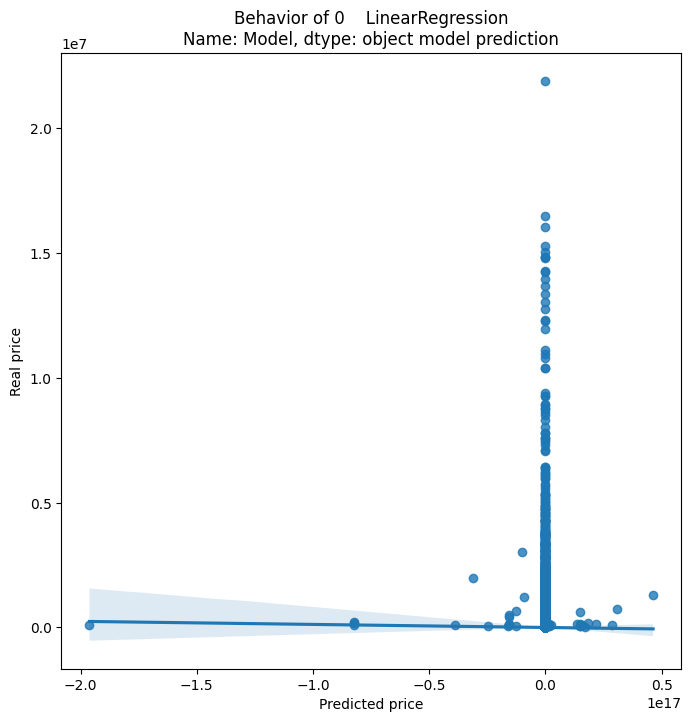

In [101]:
new_row = {"Model": ["LinearRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Ridge Regression

takes a step further and penalizes the model for the sum of squared value of the weights.

Thus, the weights not only tend to have smaller absolute values, but also really tend to penalize the extremes of the weights, resulting in a group of weights that are more evenly distributed.

In [102]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)
save(ridge, 'ridge_regression')

MAE: 218311.21284781312
MSE: 317835198841.6077
RMSE: 563768.7458893121
R2 Score: 0.6167907250899145
------------------------------
RMSE Cross-Validation: 693558.868437495
### model persisted ####


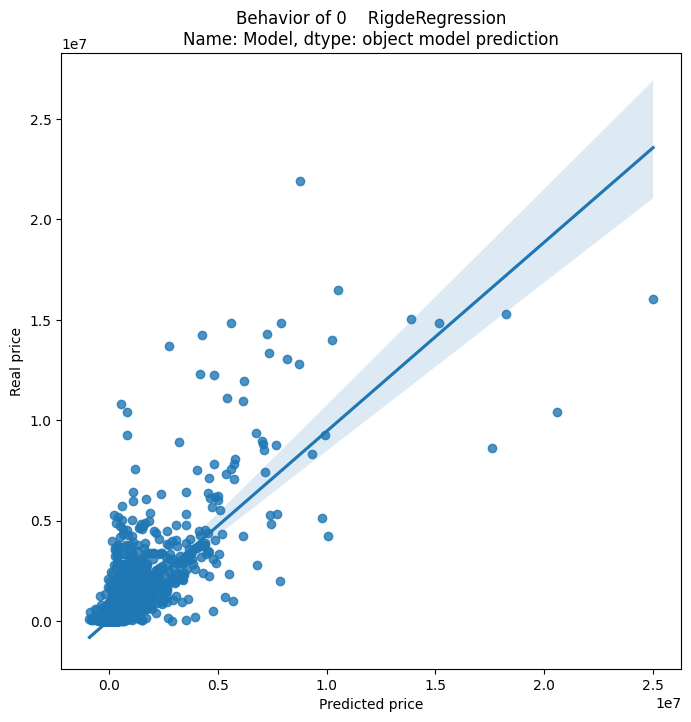

In [103]:
new_row = {"Model": ["RigdeRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Lasso Regression
is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights.

Thus, the absolute values of weight will be (in general) reduced, and many will tend to be zeros.

In [104]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)
save(lasso, 'lasso_regression')


MAE: 218451.5485364869
MSE: 322633215562.95764
RMSE: 568008.112233406
R2 Score: 0.6110058261375764
------------------------------
RMSE Cross-Validation: 693315.8241390813
### model persisted ####


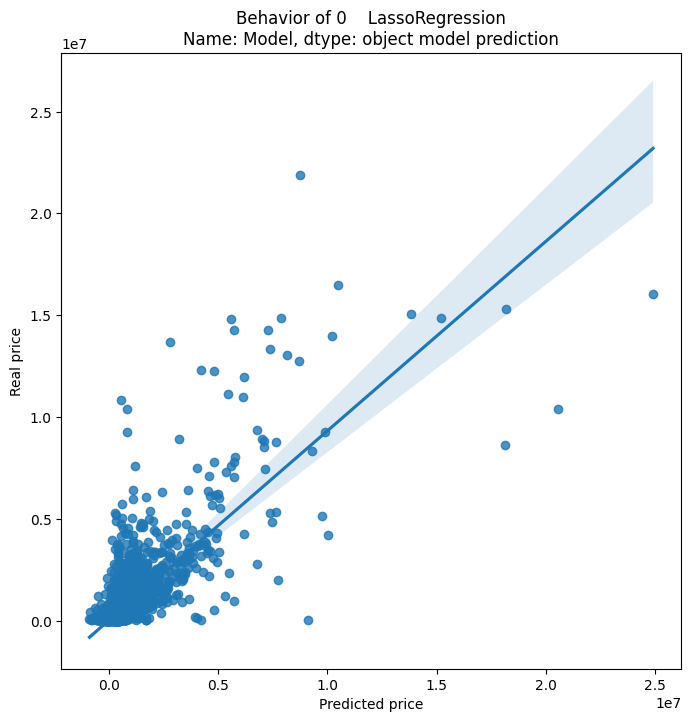

In [105]:
new_row = {"Model": ["LassoRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Elastic Net
is a hybrid of Lasso and Ridge, where both the absolute value penalization and squared penalization are included, being regulated with another coefficient l1_ratio:

In [106]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)
save(elastic_net, 'elastic_net')

MAE: 235956.1234190672
MSE: 371988701751.0753
RMSE: 609908.765104319
R2 Score: 0.5514986345366588
------------------------------
RMSE Cross-Validation: 743539.9765608471
### model persisted ####


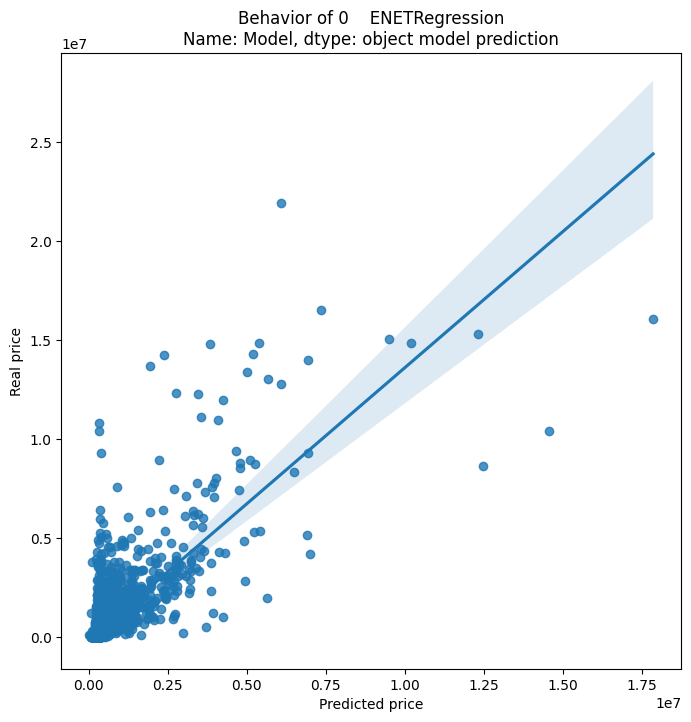

In [107]:
new_row = {"Model": ["ENETRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Random Forest Regressor

In [108]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)
save(random_forest, 'random_forest')


MAE: 107267.02144845713
MSE: 155548986322.29767
RMSE: 394396.99076222384
R2 Score: 0.8124568503462957
------------------------------
RMSE Cross-Validation: 532535.544184834
### model persisted ####


In [109]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,


'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [110]:
rf = RandomForestRegressor()

In [111]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [112]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=  35.7s
[CV] END bootstrap=False, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   7.6s
[CV] END bootstrap=True, max_depth=120, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=  15.4s
[CV] END bootstrap=True, max_depth=120, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=  15.6s
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   6.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   6.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   9.8s
[CV] END bootstrap=True, max_depth=120, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=  45.4s
[CV

[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=  33.0s
[CV] END bootstrap=False, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   8.2s
[CV] END bootstrap=False, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   7.2s
[CV] END bootstrap=True, max_depth=120, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=  15.7s
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   6.9s
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   6.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   6.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=  10.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, min_sam

[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=  34.4s
[CV] END bootstrap=False, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   7.6s
[CV] END bootstrap=False, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   6.8s
[CV] END bootstrap=True, max_depth=120, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=  15.4s
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   7.0s
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   6.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   7.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=  10.3s
[CV] END bootstrap=True, max_depth=120, min_samples_leaf=1, min_sa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [113]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 100, 'bootstrap': True}  



In [114]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_depth= 20, bootstrap=True) 
randmf.fit( X_train, y_train)
predictions = randmf.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)
save(random_forest, 'random_forest')


MAE: 114167.22000832169
MSE: 169878837038.643
RMSE: 412163.6046992056
R2 Score: 0.7951795578293109
------------------------------
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=  14.4s
[CV] END bootstrap=True, max_depth=120, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=  39.1s
[CV] END bootstrap=True, max_depth=60, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=  18.8s
[CV] END bootstrap=True, max_depth=60, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=  19.1s
[CV] END bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time= 1.9min
[CV] END bootstrap=False, max_depth=110, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=  24.6s
[CV] END bootstrap=False, max_depth=110, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=  26.9s
[CV] END bootstrap=True, max_depth=80, min_sample

[CV] END bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 1.3min
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time= 1.2min
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time= 1.4min
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time= 1.3min
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time= 2.6min
[CV] END bootstrap=False, max_depth=120, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=  30.3s
[CV] END bootstrap=True, max_depth=100, min_samples_leaf=1

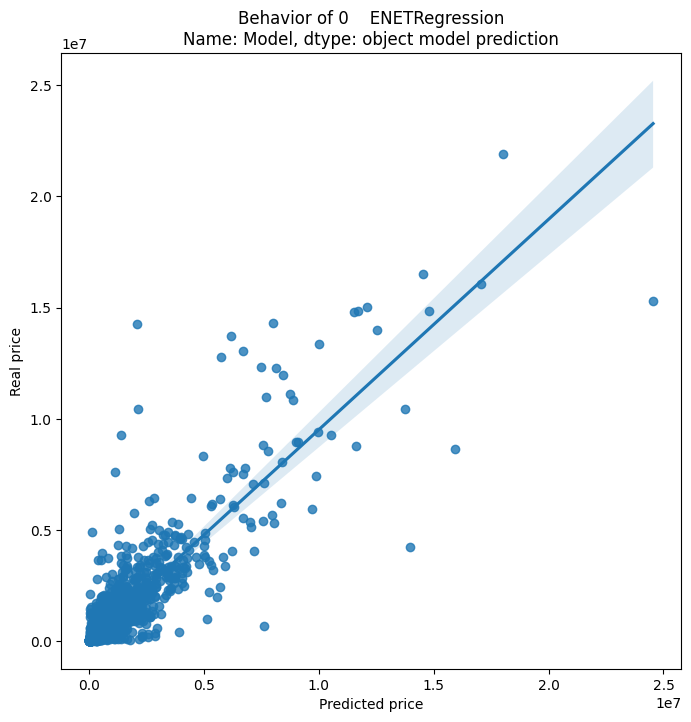

In [115]:
plot_model_performance(y_test, predictions, new_row['Model'])

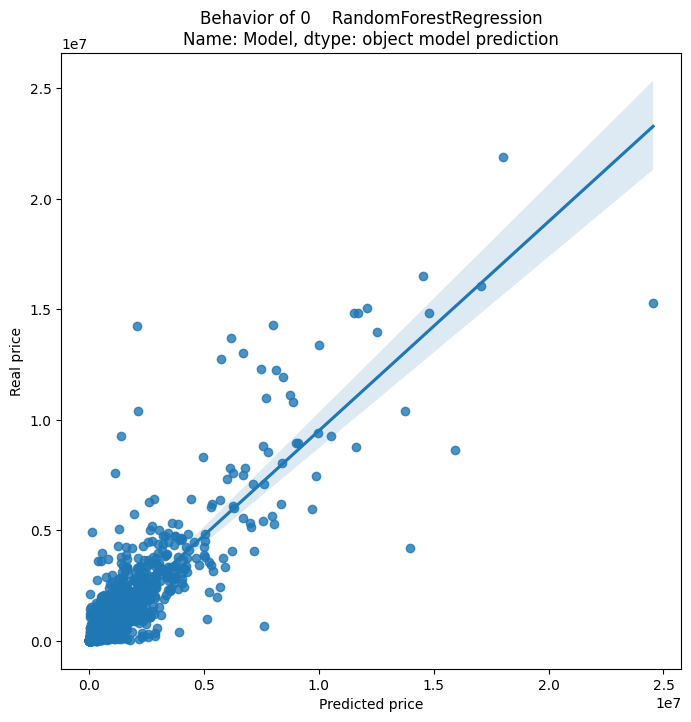

In [116]:
new_row = {"Model": ["RandomForestRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### XGBoost Regressor

In [117]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)
save(xgb, 'xgb_regressor')

MAE: 178758.62895099344
MSE: 309115274905.02734
RMSE: 555981.3620122777
R2 Score: 0.62730421050999
------------------------------
RMSE Cross-Validation: 719703.431367494
### model persisted ####


In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor



pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', XGBRegressor())])
pipeline.fit(X_train, y_train)

In [ ]:
pipeline.score(X_test, y_test)

In [ ]:
pipeline.get_params().keys()

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor

In [ ]:
hyperparameter_grid = {
    'regressor__n_estimators': [100, 500, 1000, 2000],
    'regressor__max_depth': [3, 6, 9, 12],
    'regressor__learning_rate': [0.01, 0.03, 0.05, 0.1]
}


random_cv = sklearn.model_selection.RandomizedSearchCV(estimator=pipeline,
            param_distributions=hyperparameter_grid,
            cv=5, 
            n_iter=100,
            scoring = 'neg_root_mean_squared_error',
            n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)



random_cv.fit(X_train, y_train)

In [ ]:
best_pipe = random_cv.best_estimator_

In [ ]:
best_pipe

In [ ]:
best_pipe.score(X_test, y_test)

In [ ]:
new_row = {"Model": ["XGBRegression"],
           "MAE": [mae],
           "MSE": [mse],
           "RMSE": [rmse],
           "R2 Score": [r_squared],
           "RMSE (Cross-Validation)": [rmse_cross_val]}
new_row = pd.DataFrame.from_dict(new_row)

models = pd.concat([models, new_row])
models.reset_index()
models

plot_model_performance(y_test, predictions, new_row['Model'])

### Model Comparison
The less the Root Mean Squared Error (RMSE), The better the model is.

In [ ]:
models.sort_values(by="RMSE (Cross-Validation)")

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()